## Kaggle - Titanic data set (assignment)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
import seaborn as sns

In [47]:
# Acquire data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
full_data = [train, test]

In [48]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [49]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [50]:
df2 = train.copy()

In [51]:
df2['New_Age'] = df2['Age'].fillna(df2['Age'].mean())

In [52]:
df2['New_Age'] = pd.to_numeric(df2['New_Age']).round()

In [53]:
df2.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New_Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,30.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,54.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,2.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,27.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,14.0


In [54]:
df2 = df2.drop(['Age'], axis=1)

In [67]:
df3 = pd.get_dummies(df2, columns=['Sex'], dtype='float')

In [68]:
df3.head()

,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New_Age,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,NaN,S,22.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,C85,C,38.0,1.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,C123,S,35.0,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",0,0,373450,8.0500,NaN,S,35.0,0.0,1.0


In [69]:
df3.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'New_Age', 'Sex_female', 'Sex_male'],
      dtype='object')

In [34]:
df2.shape

(891, 13)

In [71]:
df3.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,New_Age,Sex_female,Sex_male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594,32.204208,29.754209,0.352413,0.647587
std,257.353842,0.486592,0.836071,1.102743,0.806057,49.693429,13.000828,0.477990,0.477990
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,7.910400,22.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,0.000000,14.454200,30.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,0.000000,31.000000,35.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000,512.329200,80.000000,1.000000,1.000000


/Users/otorreso/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/otorreso/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


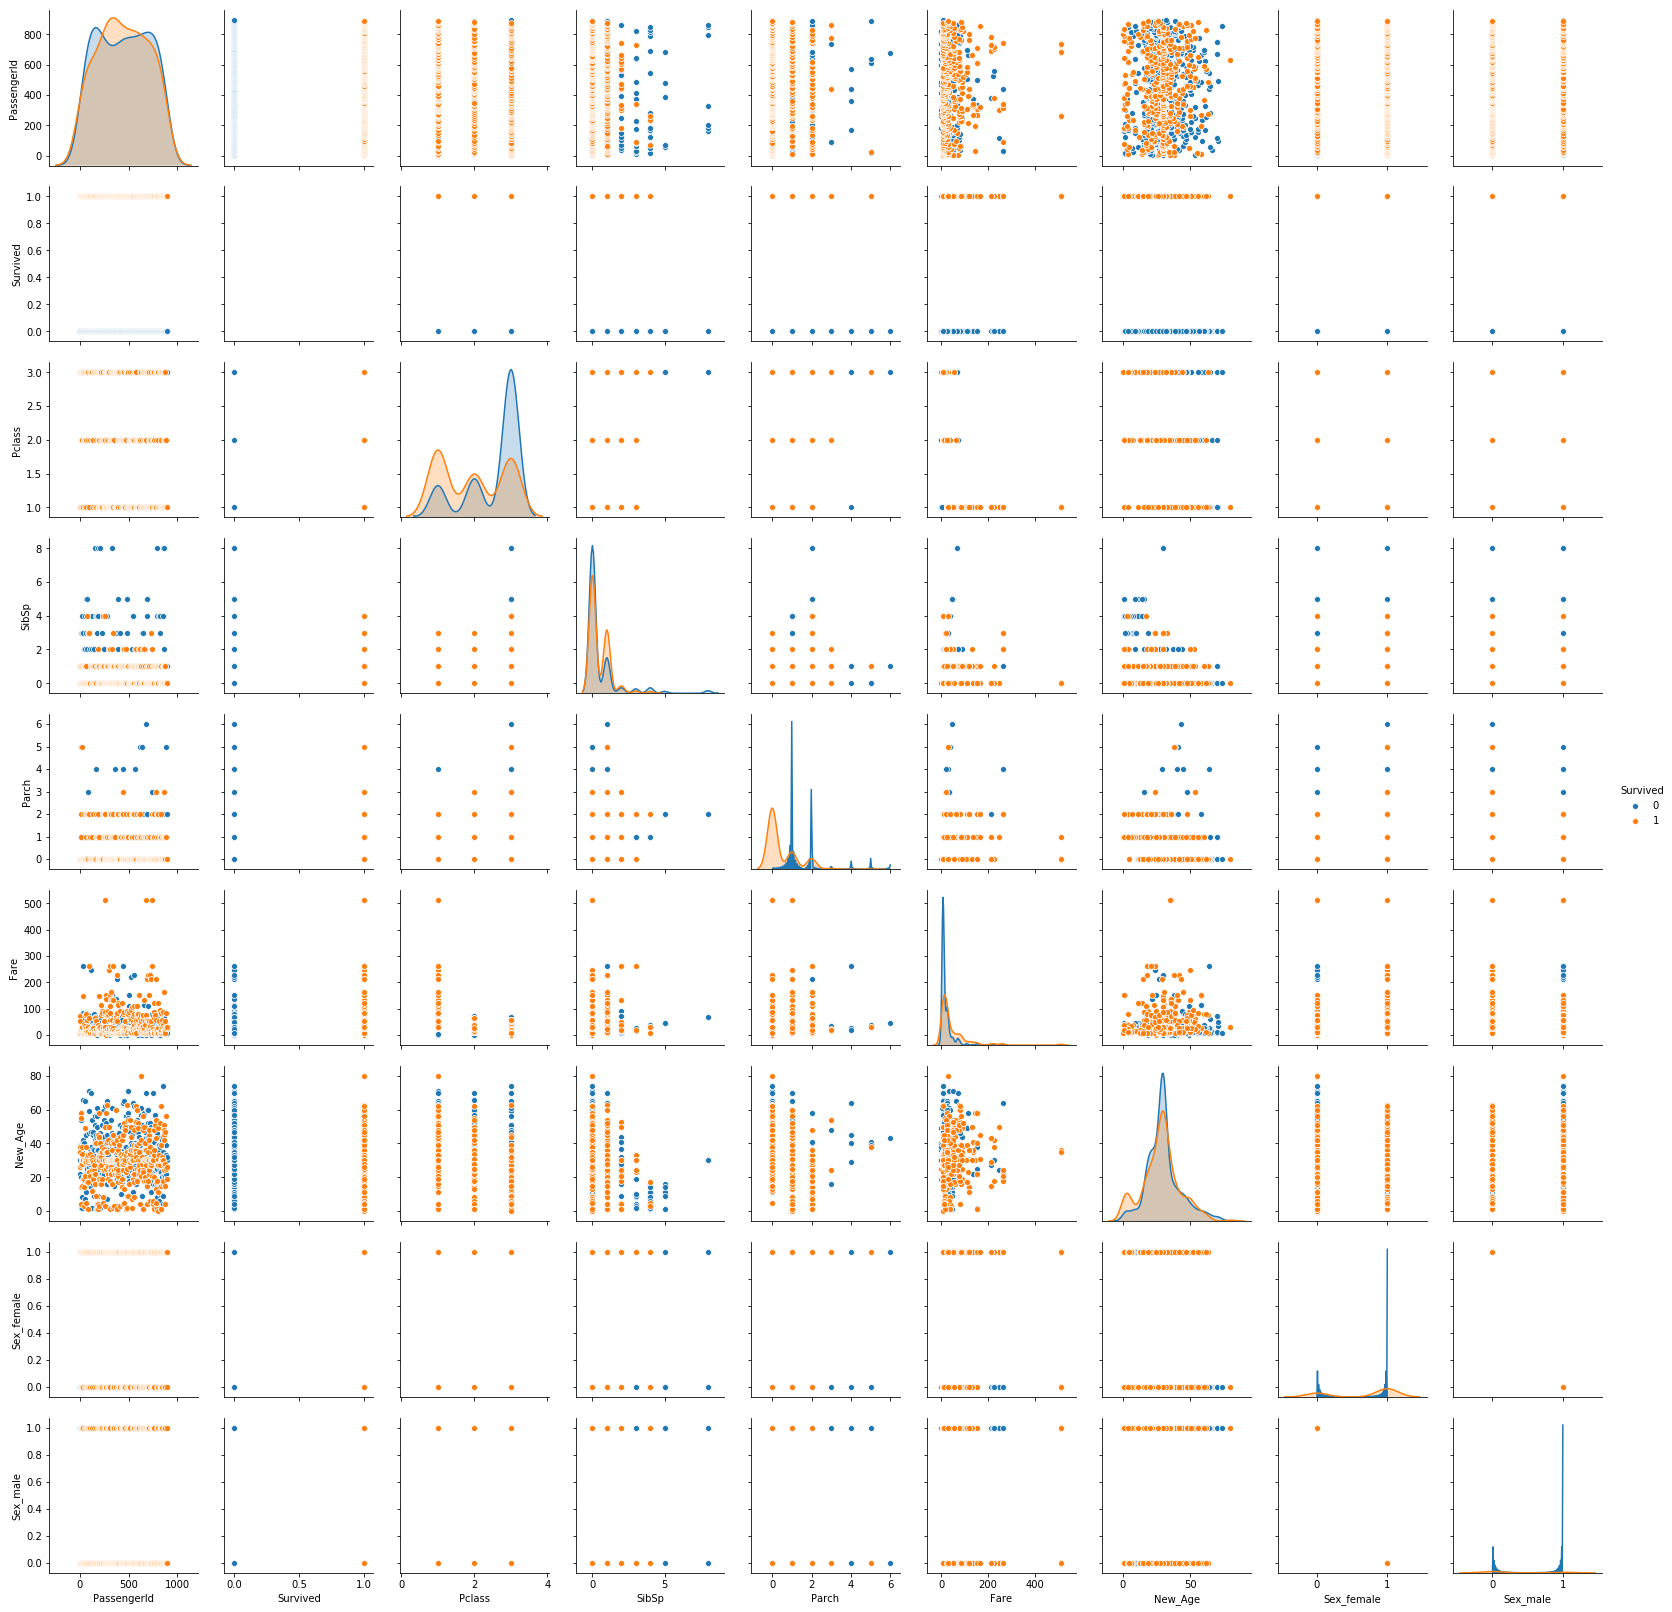

In [70]:
sns.pairplot(data=df3, hue='Survived')

In [72]:
df2.info()
print("-" * 40)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
New_Age        891 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null o

In [73]:
df2['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [74]:
df2['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [75]:
#most of the passengers did not travel with parents or children
((df2['Parch'] == 0).value_counts()) / df2['Parch'].count()

True     0.760943
False    0.239057
Name: Parch, dtype: float64

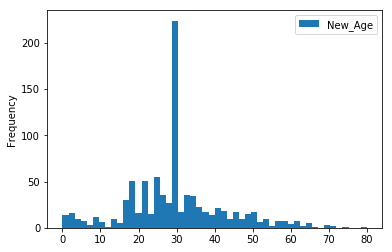

In [76]:
df2[['New_Age']].plot.hist(bins=50)

In [77]:
df2['New_Age'].unique() #use the mode instead of the mean for this

array([22., 38., 26., 35., 30., 54.,  2., 27., 14.,  4., 58., 20., 39.,
       55., 31., 34., 15., 28.,  8., 19., 40., 66., 42., 21., 18.,  3.,
        7., 49., 29., 65.,  5., 11., 45., 17., 32., 16., 25.,  1., 33.,
       23., 24., 46., 59., 71., 37., 47., 70., 12.,  9., 36., 51., 56.,
       44., 61., 50., 62., 41., 52., 63., 43., 60., 10., 64., 13., 48.,
       53., 57., 80.,  6.,  0., 74.])

In [79]:
df2['New_Age'].mode

<bound method Series.mode of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5      30.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17     30.0
18     31.0
19     30.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26     30.0
27     19.0
28     30.0
29     30.0
       ... 
861    21.0
862    48.0
863    30.0
864    24.0
865    42.0
866    27.0
867    31.0
868    30.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878    30.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888    30.0
889    26.0
890    32.0
Name: New_Age, Length: 891, dtype: float64>

In [72]:
age = train['Age']

In [75]:
age.value_counts() #this is the mode which doesn't count NaN

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
28.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
20.00    15
33.00    15
23.00    15
34.00    15
39.00    14
17.00    13
42.00    13
40.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
         ..
71.00     2
59.00     2
63.00     2
0.83      2
30.50     2
70.00     2
57.00     2
0.75      2
13.00     2
10.00     2
64.00     2
40.50     2
32.50     2
45.50     2
20.50     1
24.50     1
0.67      1
14.50     1
0.92      1
74.00     1
34.50     1
80.00     1
12.00     1
36.50     1
53.00     1
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [11]:
train['Age'].fillna(train['Age'].mode().values[0]) #the 0 in the values is the first value. 

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5      24.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17     24.0
18     31.0
19     24.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26     24.0
27     19.0
28     24.0
29     24.0
       ... 
861    21.0
862    48.0
863    24.0
864    24.0
865    42.0
866    27.0
867    31.0
868    24.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878    24.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [12]:
agemissing = train[train['Age'].isnull()]

In [25]:
agemissing.groupby('Parch')['PassengerId'].count()

Parch
0    157
1      8
2     12
Name: PassengerId, dtype: int64

In [14]:
train[train['Parch'] == 0]['Age'].mode()

0    30.0
dtype: float64

In [15]:
train[train['Parch'] == 0]['Age'].mode().iloc[0]

30.0

In [16]:
train.loc[23]

PassengerId                              24
Survived                                  1
Pclass                                    1
Name           Sloper, Mr. William Thompson
Sex                                    male
Age                                      28
SibSp                                     0
Parch                                     0
Ticket                               113788
Fare                                   35.5
Cabin                                    A6
Embarked                                  S
Name: 23, dtype: object

In [17]:
train.loc[23, 'PassengerId']

24

In [18]:
train.loc[(train['Parch'] == 0) & (train['Age'].isnull()), 'Age'] = train[train['Parch'] == 0]['Age'].mode().iloc[0]

In [19]:
train.loc[(train['Parch'] != 0) & (train['Age'].isnull()), 'Age'] = train[train['Parch'] == 0]['Age'].mode().iloc[0]

In [20]:
train[train['Parch'] != 0]['Age'].mode().iloc[0] #I was expecting the mode to be 2 years old here. Not 30. I did something wrong.

30.0

In [26]:
#on my own:

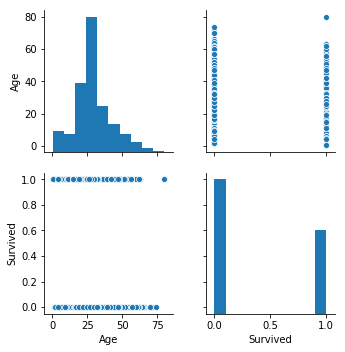

In [21]:
sns.pairplot(train[['Age', 'Survived']])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived'], axis=1),
                                                   train['Survived'],
                                                   stratify=train['Survived'])

In [23]:
tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train) #call a class and then get an instance of that class.
                                                                    #then we inmediately call fit, which inmediately returns 
                                                                    #value.

ValueError: could not convert string to float: 'S'

In [31]:
tree #max_features and max_depth are hyperparameters

NameError: name 'tree' is not defined

In [15]:
tree.score(X_train, y_train) #every one of the points are hitting on a partition of that data. So it's a perfect score.

1.0

In [20]:
tree.score(X_test, y_test)

0.9790209790209791

In [22]:
#the problem of Decision Trees is that they are prone to be overfitted. To improve generality, create fewer partitions
#because it still has to optimize for all the partitions

In [23]:
tree = DecisionTreeClassifier(random_state=0, max_depth=4).fit(X_train, y_train) #this limits partitions

In [24]:
tree.score(X_train, y_train)

0.9859154929577465

In [25]:
tree.score(X_test, y_test)

0.972027972027972

In [26]:
#the more "tiny pockets" (partitions) you create, the more chances or increased chances you have to getting it wrong.

In [27]:
#how much should I fit my tree? Why max_depth 4? Answer: you should choose the parameters that fit your model.

In [30]:
#Cross validation helps here. We don't need malign tumors in this example. Stratified data can help.

In [31]:
StratifiedKFold?

StratifiedKFold(n_splits=3, random_state=None, shuffle=False)

In [34]:
cv = StratifiedKFold(3) #3 is the default anyway

In [36]:
cross_val_score(DecisionTreeClassifier(random_state=0, max_depth=4), X_train, y_train, cv=cv)

array([0.92253521, 0.91549296, 0.94366197])

## Grid search - 

In [68]:
params = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
         'min_samples_split': [3, 4, 5, 6, 7, 8] #our GridSearch will try multiple combinations
         }

In [44]:
GridSearchCV? #we are going to create a Grid Search object ("gs_tree")

SyntaxError: invalid syntax (<ipython-input-44-00fc9e1b4b14>, line 1)

In [70]:
gs_tree = GridSearchCV(DecisionTreeClassifier(), param_grid=params, n_jobs=1, cv=cv) #cv is a validator and will be how we shuffle things.

In [71]:
gs_tree.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9], 'min_samples_split': [3, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [72]:
gs_tree.best_params_

{'max_depth': 4, 'min_samples_split': 3}

In [73]:
gs_tree.score(X_train, y_train)

0.9859154929577465

In [74]:
gs_tree.score(X_test, y_test)

0.965034965034965